FileNotFoundError: data/noipfb/ipc_U-0.5_dt0.1_cdt0.1_cnImp2/L200/irlm_no_L200.txt not found.

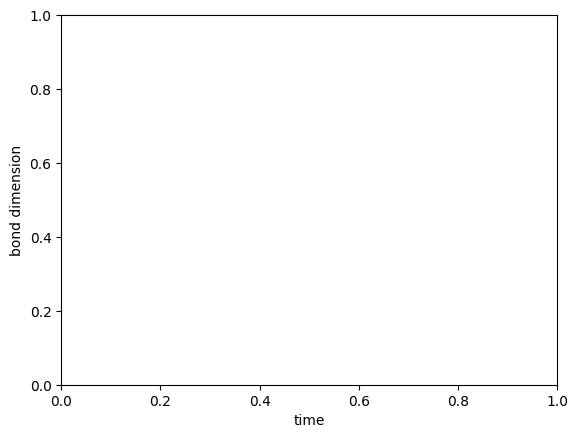

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.ylabel("bond dimension")
plt.xlabel("time")

dt=0.1
lab="b"
for U in [-0.5,0.5]:
    for cnImp in [2,-1]:
        for L in [200]:
            n0=np.loadtxt(f"data/noipf{lab}/ipc_U{U}_dt{dt}_cdt{dt}_cnImp{cnImp}/L{L}/irlm_no_L{L}.txt", skiprows=1)
            #n0old=np.loadtxt(f"data/dt{dt}/tdvp_no8/L{L}/irlm_no_L{L}.txt", skiprows=1)
            #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
            #plt.plot(n0old[:,0],n0old[:,2], label=f"old: dt={dt} L={L}", color="green")
            #plt.plot(n0gs2[:,0],n0gs2[:,2], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
            plt.plot(n0[:,0],n0[:,2], label=f"nImp={cnImp} IP: U={U}, dt={dt} L={L}")    
plt.legend(loc="upper left")

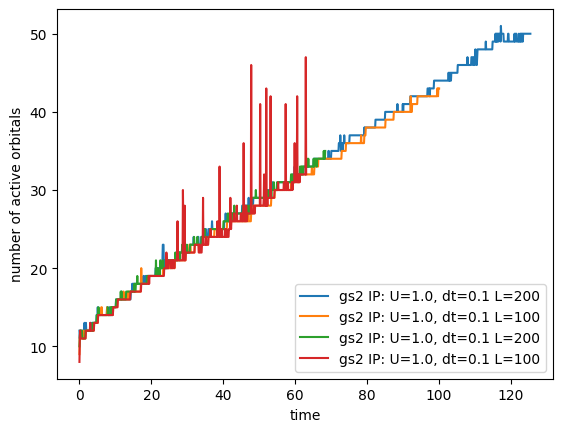

In [14]:
plt.ylabel("number of active orbitals")
plt.xlabel("time")

dt=0.1
for lab in ["b","c"]:
    for L in [200,100]:
        n0=np.loadtxt(f"data/noipf{lab}/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
        #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
        #plt.plot(n0gs2[:,0],n0gs2[:,6], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
        plt.plot(n0[:,0],n0[:,6], label=f"gs2 IP: U={U}, dt={dt} L={L}")    
plt.legend()

### Real space occupations

In [20]:
def LoadComplexData(file,**genfromtext_args):
    """
    Load complex data in the C++ format in numpy.
    """
    array_as_strings = np.loadtxt(file,dtype=str,**genfromtext_args)
    complex_parser = np.vectorize(lambda x: complex(*eval(x)))
    return complex_parser(array_as_strings)

2.0533957362104324e-12
(50.00000000000864+1.234672863990511e-14j)
2.844149925301324e-12
(50.000000000011966-5.4446324041809934e-15j)
3.631739745997968e-12
(50.00000000001542-2.580237493734619e-14j)
4.129848663194941e-12
(50.0000000000173+2.248556926746612e-14j)
4.526069248715878e-12
(50.000000000018886-1.84816456604456e-14j)
4.946800920332501e-12
(50.000000000020584-1.1019386937147463e-14j)
5.346725207444774e-12
(50.00000000002238-2.855907927261735e-15j)
5.7382832960973315e-12
(50.00000000002396-3.2383526531368957e-15j)
6.146814461935371e-12
(50.000000000026006-9.928738411083349e-15j)


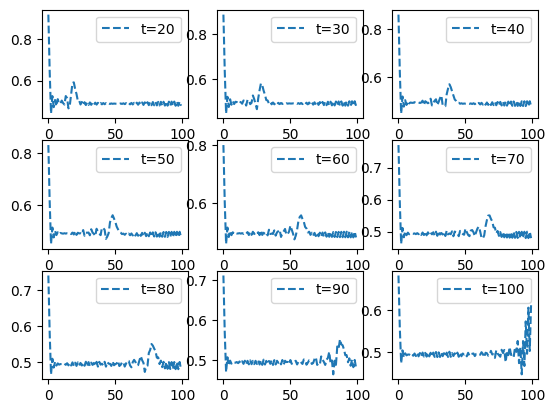

In [113]:
#plt.yscale('log')
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 3)
for t in range(0,9):
    i=t//3
    j=t%3
    ti=t+2
    for L in [100]:    
        suffix=f"t{ti*100}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/cc_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        print(np.linalg.norm(orb @ orb.H-np.identity(100)))
        ccr = orb @ cc @ orb.H
        axis[i,j].plot(range(0,L),[np.real(x) for x in ccr.diagonal().tolist()[0][0:]], '--', label=f't={ti*10}')
        print(np.trace(ccr))
#plt.plot([.1/x for x in range(1,L)],'o-')
    axis[i,j].legend()
    
plt.show()

2.0533957362104324e-12
(46.873689244712004-3.3439288083289616e-15j)
2.844149925301324e-12
(46.1305400096559-2.6211753516834698e-14j)
3.631739745997968e-12
(45.40290660557004-1.8601415513878888e-15j)
4.129848663194941e-12
(44.61683476264568+3.3871718020000305e-15j)
4.526069248715878e-12
(43.830148803141086+8.987376339511425e-16j)
4.946800920332501e-12
(42.999788644523164+1.5746219549982077e-14j)
5.346725207444774e-12
(42.15780098899332+3.3451733017282208e-15j)
5.7382832960973315e-12
(41.30303211341629+1.657290052218397e-14j)
6.146814461935371e-12
(40.44062973381654+2.2528859275113347e-14j)


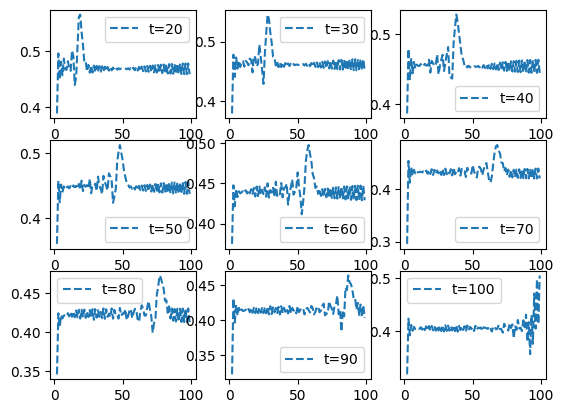

In [114]:
figure, axis = plt.subplots(3, 3)
for t in range(0,9):
    i=t//3
    j=t%3
    ti=t+2
    for L in [100]:    
        suffix=f"t{ti*100}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/cck_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        print(np.linalg.norm(orb @ orb.H-np.identity(100)))
        ccr = orb @ cc @ orb.H
        axis[i,j].plot(range(2,L),[np.real(x) for x in ccr.diagonal().tolist()[0][2:]], '--', label=f't={ti*10}')
        print(np.trace(ccr))
    axis[i,j].legend()    
plt.show()